<a href="https://colab.research.google.com/github/PINKIREKHA/loantap_business_case/blob/main/LOANTAP_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LOAN TAP BUSINESS CASE USING LOGISTIC REGRESSION





### Context:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.
The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.
LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
1.	Personal Loan
2.	EMI Free Loan
3.	Personal Overdraft
4.	Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only


## Problem Statement:


Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?


### Dataset link :
https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view


###Data dictionary:


1.	loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2.	term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3.	int_rate : Interest Rate on the loan
4.	installment : The monthly payment owed by the borrower if the loan originates.
5.	grade : LoanTap assigned loan grade
6.	sub_grade : LoanTap assigned loan subgrade
7.	emp_title :The job title supplied by the Borrower when applying for the loan.*
8.	emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9.	home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10.	annual_inc : The self-reported annual income provided by the borrower during registration.
11.	verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12.	issue_d : The month which the loan was funded
13.	loan_status : Current status of the loan - Target Variable
14.	purpose: A category provided by the borrower for the loan request.
15.	title: The loan title provided by the borrower
16.	dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17.	earliest_cr_line: The month the borrower's earliest reported credit line was opened
18.	open_acc : The number of open credit lines in the borrower's credit file.
19.	pub_rec : Number of derogatory public records
20.	revol_bal : Total credit revolving balance
21.	revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22.	total_acc : The total number of credit lines currently in the borrower's credit file
23.	initial_list_status : The initial listing status of the loan. Possible values are – W, F
24.	application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25.	mort_acc : Number of mortgage accounts.
26.	pub_rec_bankruptcies: Number of public record bankruptcies
27.	Address: Address of the individual



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df =pd.read_csv("logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
print("number of rows :", df.shape[0])
print("number of columns :", df.shape[1])

number of rows : 396030
number of columns : 27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

PRELIMINARY ANALYSIS

In [ ]:
# statisticsl summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


From the above summary its observed that there are outliers present in many columns as there is a huge variation in mean and 50% values. Hence, they need to be treated accordingly .

### DATA CLEANING

In [ ]:
# checkimg the column datatypes
cat_cols = df.select_dtypes(include = "object").columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
# check the unique values in cat_cols
for col in cat_cols:
  print(f"num of unique values in {col} : {df[col].nunique()} ")

num of unique values in term : 2 
num of unique values in grade : 7 
num of unique values in sub_grade : 35 
num of unique values in emp_title : 173105 
num of unique values in emp_length : 11 
num of unique values in home_ownership : 6 
num of unique values in verification_status : 3 
num of unique values in issue_d : 115 
num of unique values in loan_status : 2 
num of unique values in purpose : 14 
num of unique values in title : 48817 
num of unique values in earliest_cr_line : 684 
num of unique values in initial_list_status : 2 
num of unique values in application_type : 3 
num of unique values in address : 393700 


In [ ]:
# convert date columns to datetime format
df["issue_d"] = pd.to_datetime(df["issue_d"])
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"])

In [ ]:
# convert employment length to numeric
d = {'10+ years':10, '4 years':4, '< 1 year':0,
     '6 years':6, '9 years':9,'2 years':2, '3 years':3,
     '8 years':8, '7 years':7, '5 years':5, '1 year':1}

df["emp_length"] = df["emp_length"].replace(d)

In [ ]:
# convert columns with less numeric values to categorical columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  float64       
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

In [ ]:
# check for duplicated values
df.duplicated().sum()

0

There are no duplicate instances in the data

### HANDLING MISSING VALUES

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
df["mort_acc"].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [ ]:
df['total_acc'].describe()

count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

In [ ]:
# filling the missing values to "unknown for object data type columns"
fill_val = {"title" : "unknown","emp_title" : "unknown"}
df.fillna(fill_val, inplace = True)

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
# filling null vlaues in mort_acc to average number of mort_acc
avg_mort = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']) if not np.isnan(x['total_acc']) else np.nan, axis=1)

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### OUTLIERS TREATMENT

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

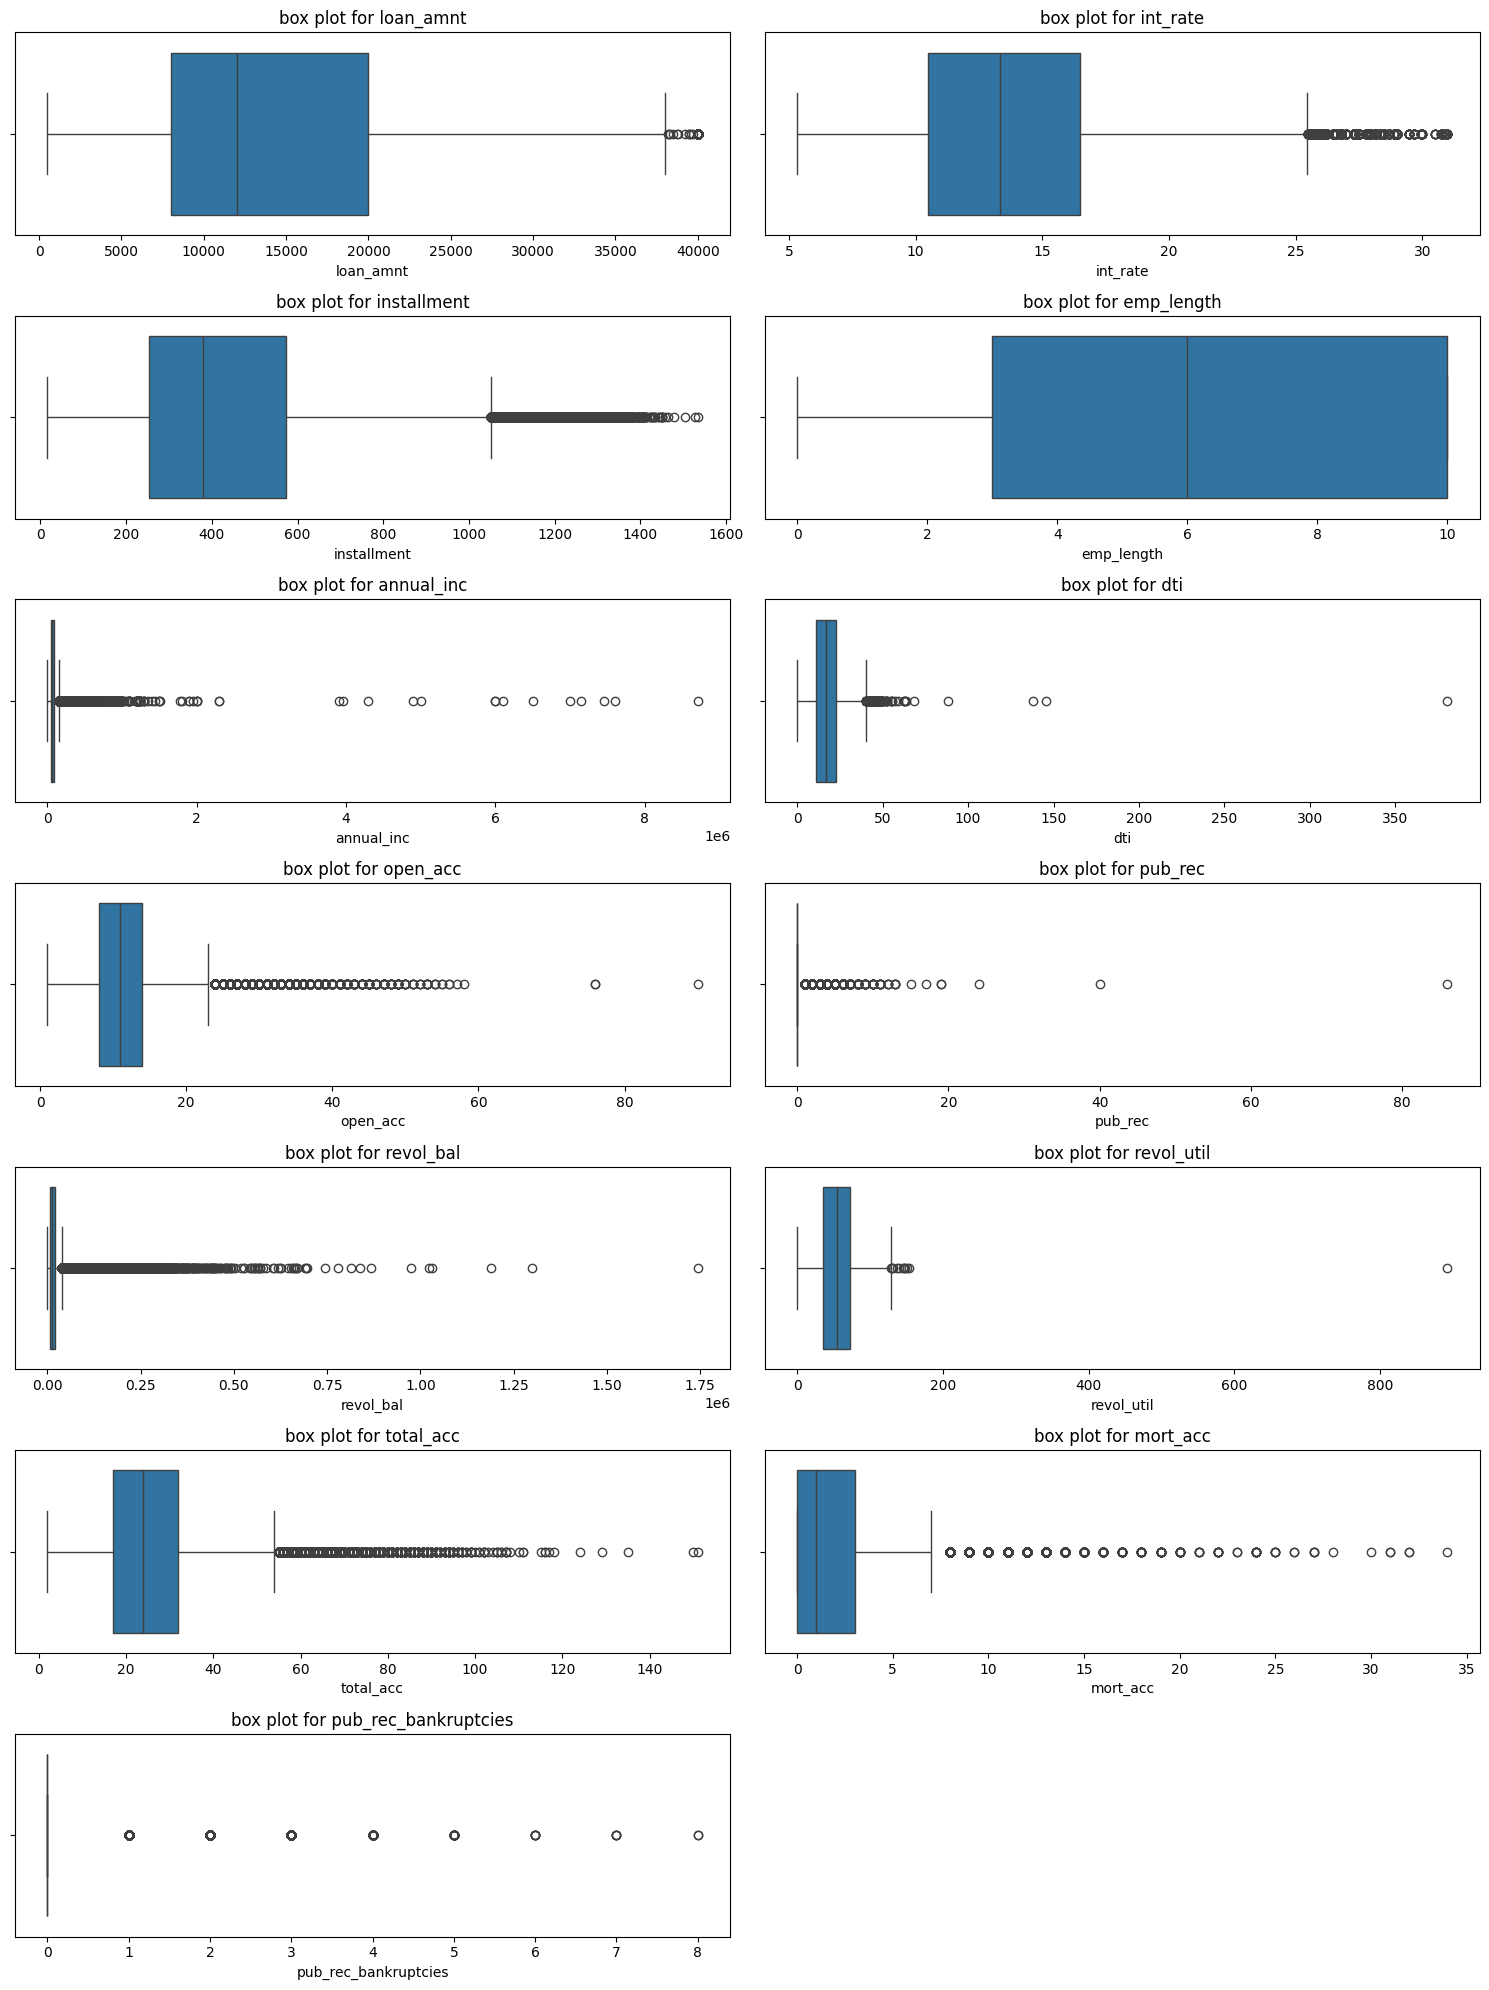

In [ ]:
fig = plt.figure(figsize = (15,20))
i =1
for col in num_cols:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f"box plot for {col}")
  i +=1

plt.tight_layout()
plt.show()



Here we can see that many columns have outliers. Lets remove the rows with outliers using standard deviation (99% data is within 3 standard deviations in case of normally distributed data).
For pub_Rec and pub_rec_bankruptcies, we can apply the 0 or 1 approach

In [ ]:
# Convert pub_rec and pub_rec_bankruptcies to categorical variables
df["pub_rec_bankruptcies"] = np.where(df["pub_rec_bankruptcies"]>0,"yes","no")

In [ ]:
df["pub_rec"] = np.where(df["pub_rec"]==0,"yes","no")

In [ ]:
df[['pub_rec_bankruptcies','pub_rec']]  = df[['pub_rec_bankruptcies','pub_rec']].astype('category')

In [ ]:
# Numeric columns after converting public records to category
num_cols =df.select_dtypes(include = "number").columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

In [ ]:
# removing outliers using standard deviation
for col in num_cols:
  mean  = df[col].mean()
  std = df[col].std()
  upper = mean + (3 *std)
  df = df[~(df[col]>upper)]


In [ ]:
df.shape

(350845, 27)

### FEATURE ENGINEERING

In [ ]:
df["address"].sample(10)

343244         3260 Galloway Hill\r\nNorth Arthur, WY 48052
250156           55582 Kelly Circle\r\nWeaverbury, MT 29597
193110    01407 Michael Bypass Apt. 871\r\nSouth William...
137687    91825 Monica Turnpike\r\nNorth Cassandrafurt, ...
109387    07417 Frederick Mountain Suite 472\r\nPerezber...
69172                    PSC 2496, Box 0689\r\nAPO AA 00813
229364             54880 Taylor Lodge\r\nJameston, AZ 70466
46852     40110 Kimberly Manors Apt. 628\r\nTateshire, T...
255488         65273 Davis Lights\r\nGoodwinshire, MD 70466
345478    81710 Taylor Ports Apt. 281\r\nDunnshire, VA 7...
Name: address, dtype: object

In [ ]:
# Deriving zip code and state from address
df[['state','zip_code']] = df["address"].apply(lambda x : pd.Series([x[-8:-6],x[-5:]]))

In [ ]:
df.drop(df["address"],axis = 1 , inplace = True)

In [ ]:
df.zip_code.nunique()

10

There are 10 unique zip codes hence we can the data type of zip code to category

In [ ]:
df['zip_code'] = df['zip_code'].astype('category')

### EXPLORATORY DATA ANALYSIS

<ipython-input-141-09c53d3a0374>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True , cmap = "viridis")


<Axes: >

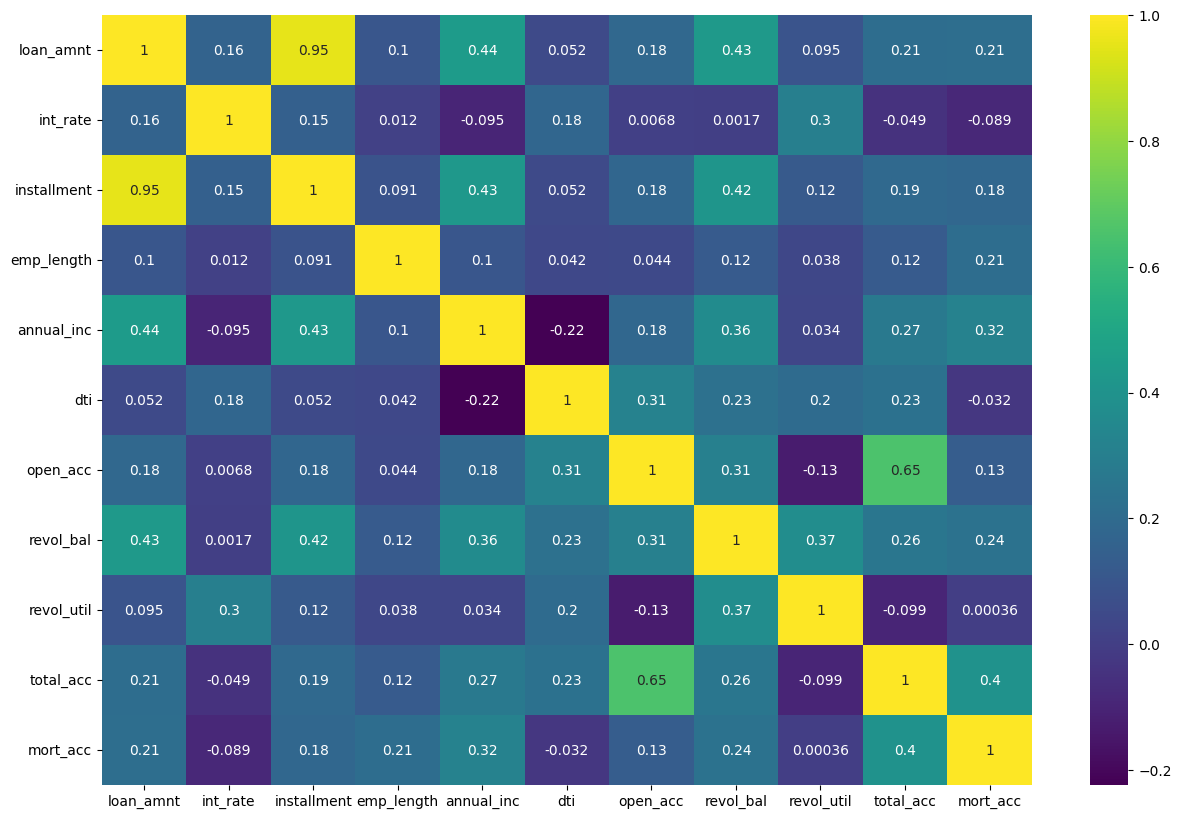

In [ ]:
#Correlation between numerical features
plt.figure(figsize = (15,10))
sns.heatmap(df.corr() , annot = True , cmap = "viridis")

from the above heatmap it is observed that there is strong correlation in installment column and loan_amnt . Hence one of them needs to be dropped.

similary total_acc is highly correlated to open_acc column

mort_acc is moderatly correlated to total_acc.


dropping corelated columns

In [ ]:
# drop installment
df.drop(columns=['installment'], inplace=True)

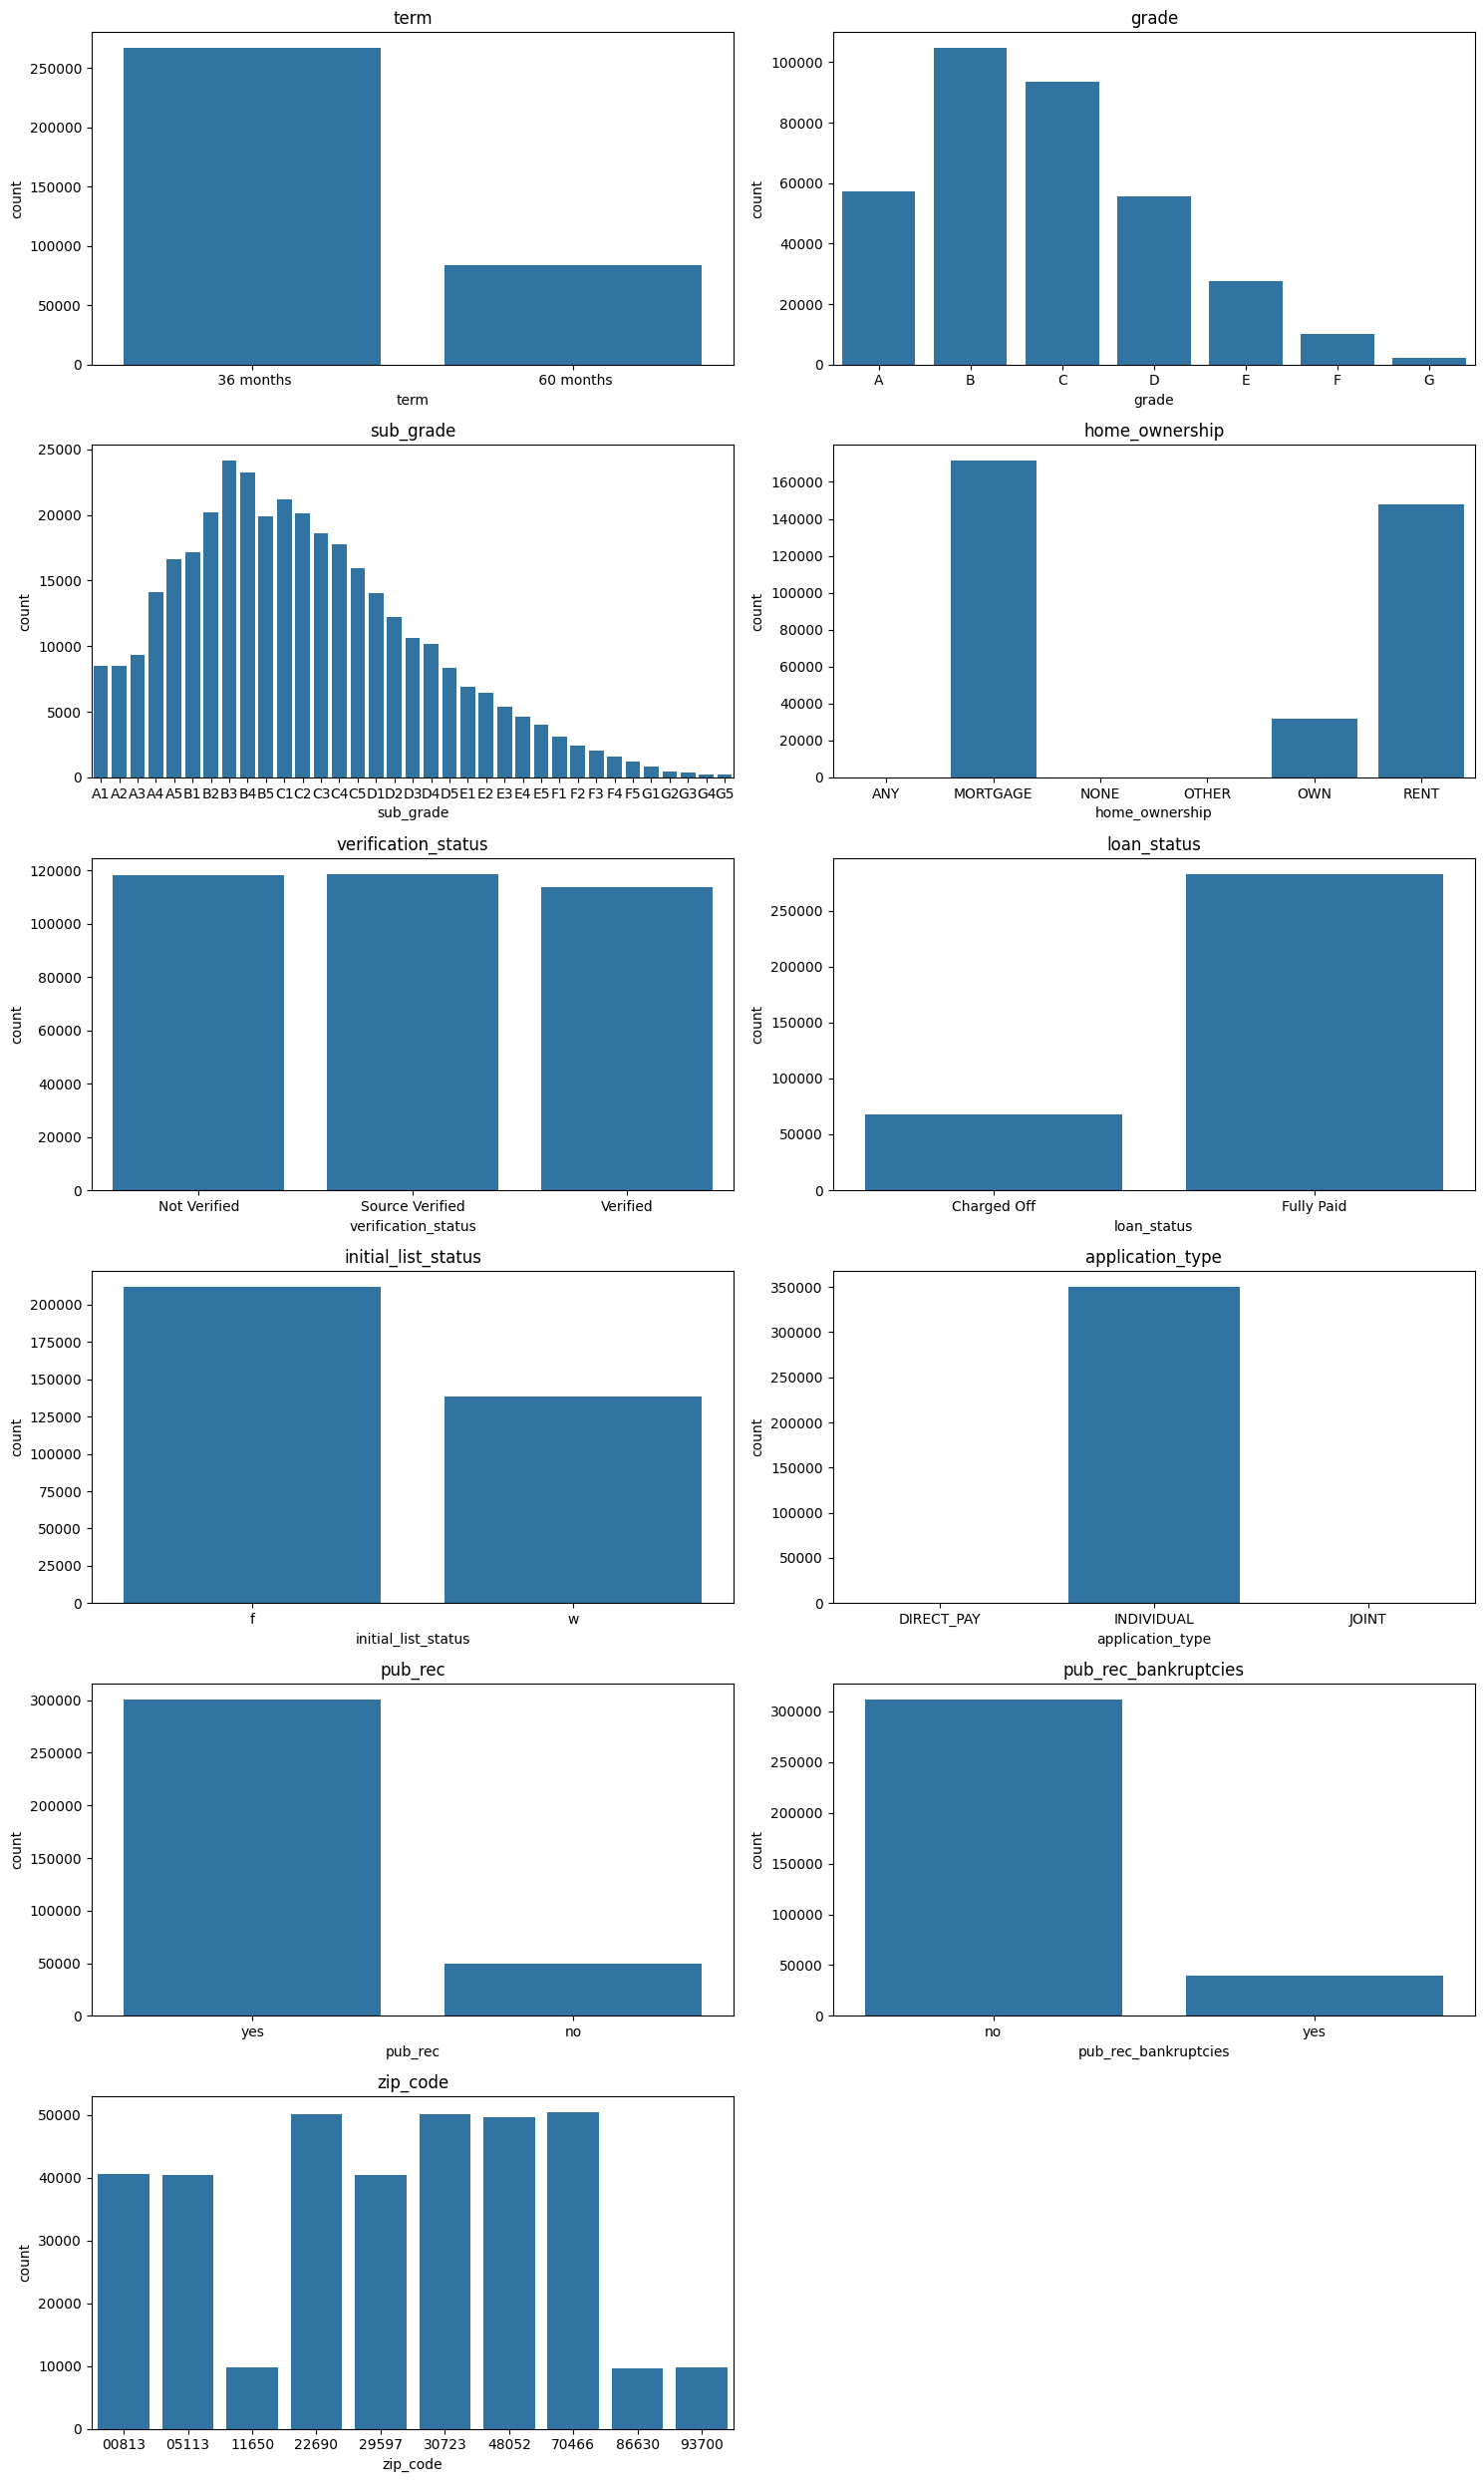

In [ ]:
# distribution of categorical columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status',
            'initial_list_status','application_type','pub_rec','pub_rec_bankruptcies','zip_code' ]

plt.figure(figsize = (15,25))
i =1
for col in cat_cols:
  ax = plt.subplot(6,2,i)
  sns.countplot(x = df[col])
  plt.title(f"{col}")
  i +=1

plt.tight_layout()
plt.show()

<ipython-input-159-dcd695d92ae2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_xticklabels(d.get_xticklabels(), rotation=45)


[Text(0, 0, 'car'),
 Text(1, 0, 'credit_card'),
 Text(2, 0, 'debt_consolidation'),
 Text(3, 0, 'educational'),
 Text(4, 0, 'home_improvement'),
 Text(5, 0, 'house'),
 Text(6, 0, 'major_purchase'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'moving'),
 Text(9, 0, 'other'),
 Text(10, 0, 'renewable_energy'),
 Text(11, 0, 'small_business'),
 Text(12, 0, 'vacation'),
 Text(13, 0, 'wedding')]

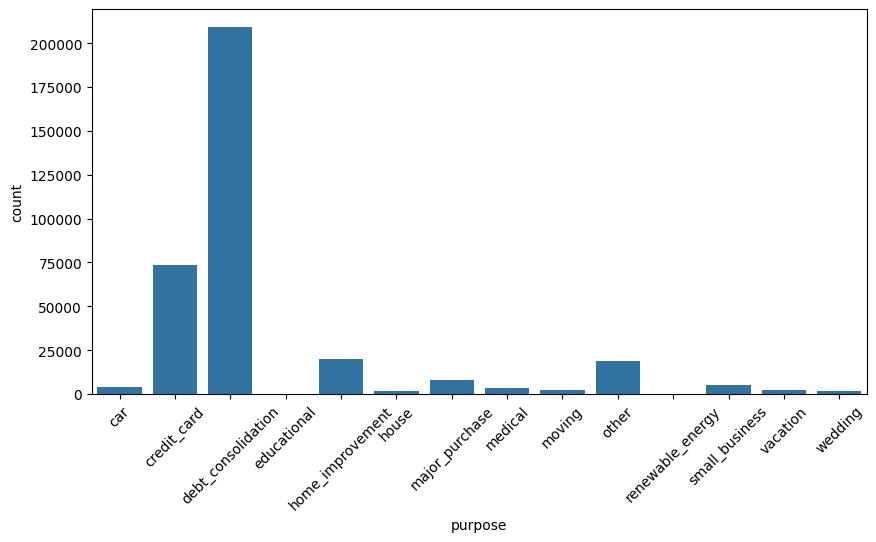

In [ ]:
plt.figure(figsize = (10,5))
d = sns.countplot(x = df["purpose"])
d.set_xticklabels(d.get_xticklabels(), rotation=45)

OBSERVATIONS

  1. Almost 80% loan are of 36months term.
  2. Maximum loans fall in B grade
  3. Home ownership type is 50% mortagage category
  4. The loan_status is imbalanced in favour of fully-paid loans. Defaulters are nearly 25% of fully paid loans.
  5. 85% of applicants don't have a public record/haven't filled for bankruptcy.
  6. 99% applicants have applied under 'individual' application type.
  7. 55% of loans are taken for the purpose of debt consolidation followed by 20% on credit card










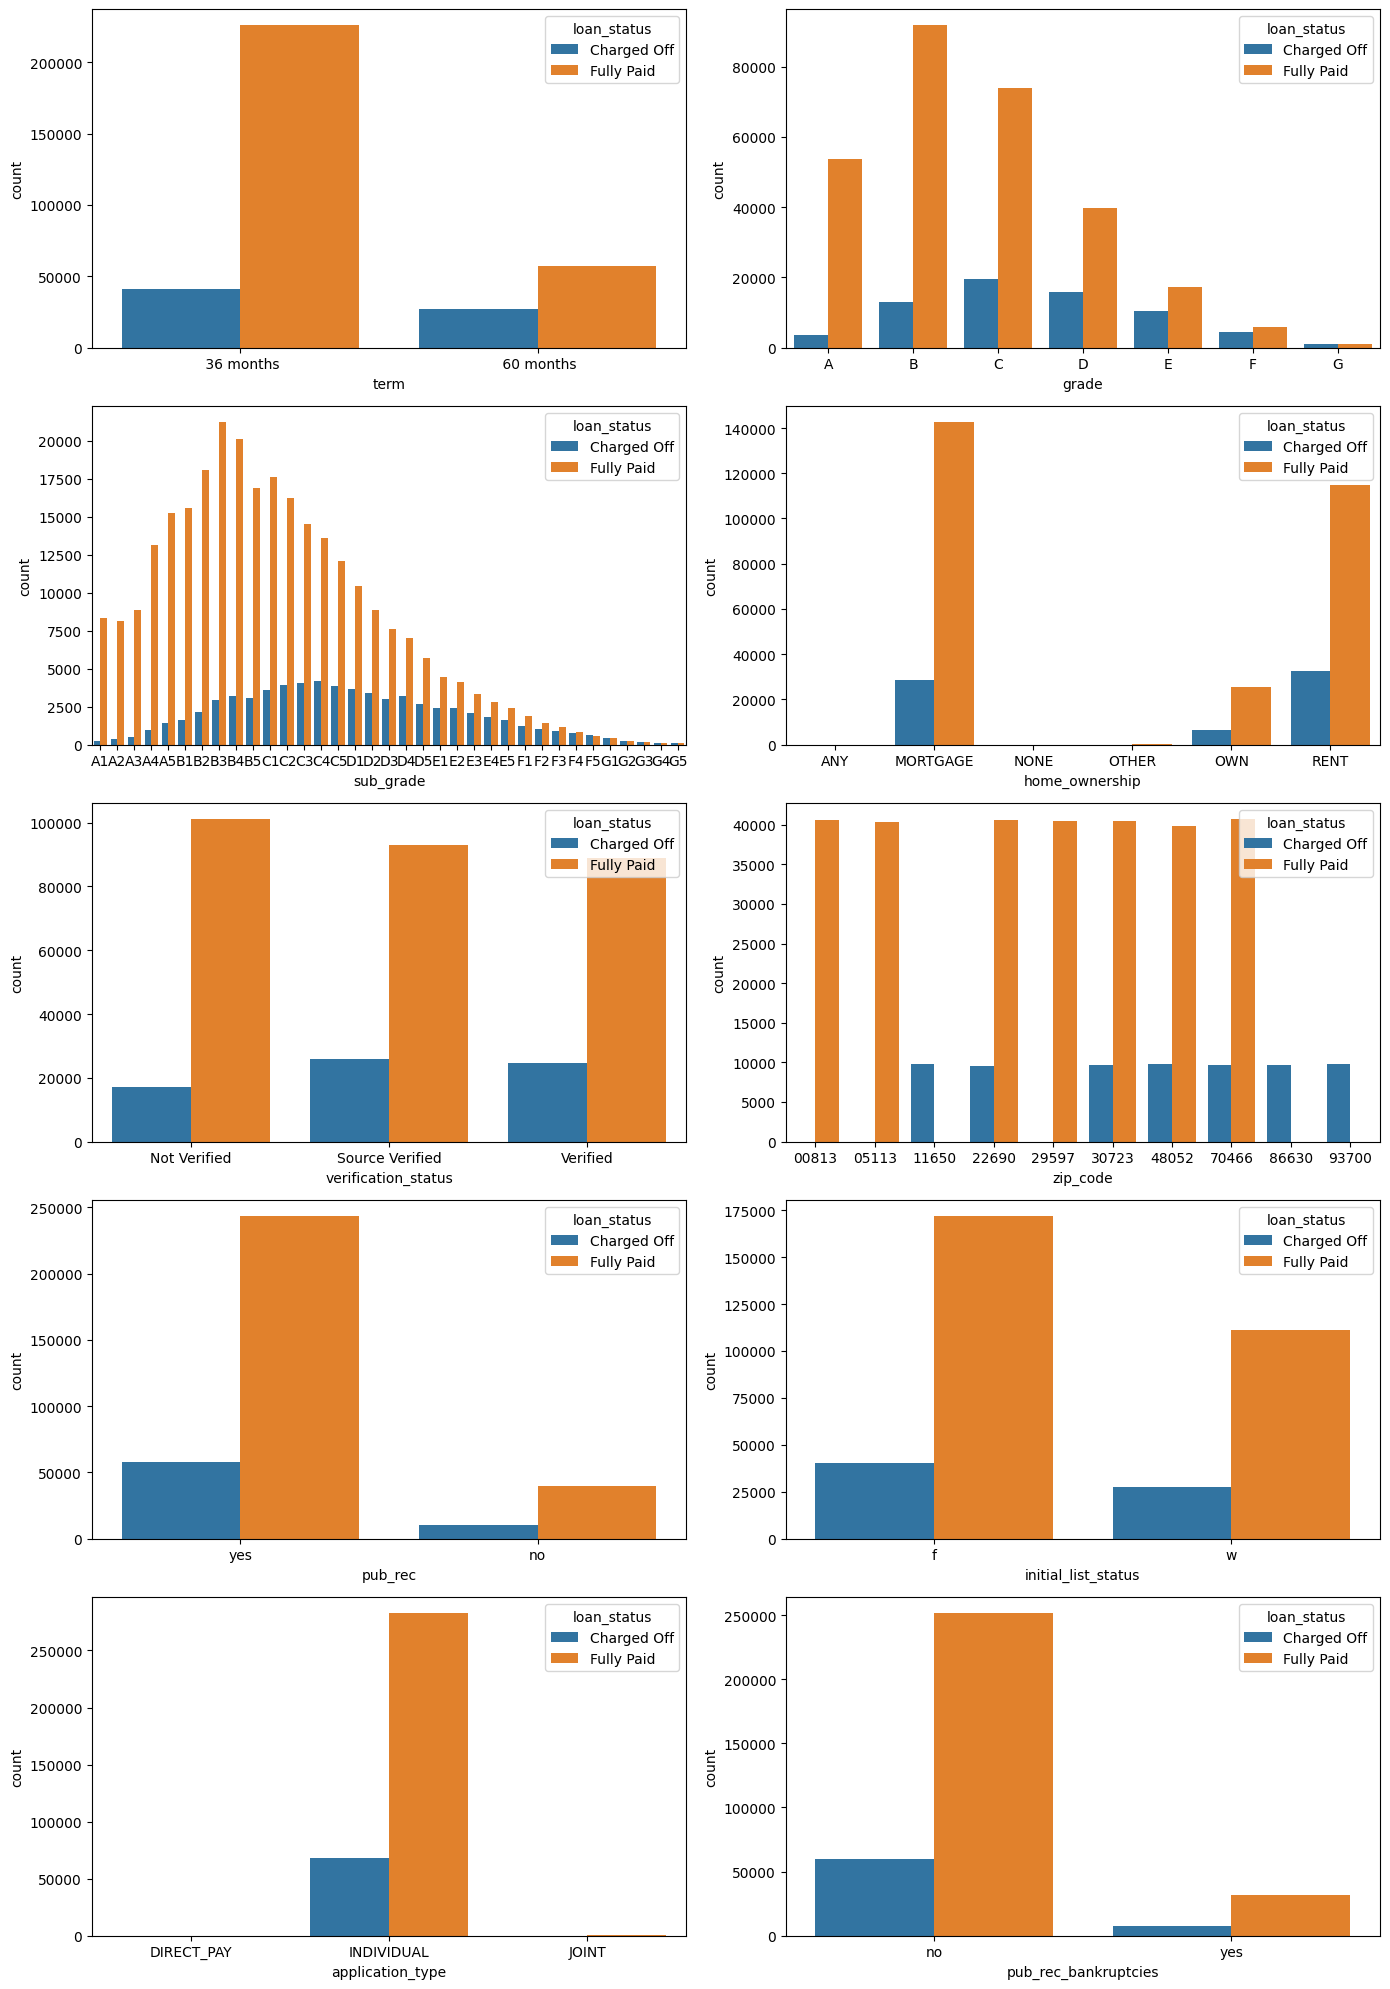

In [ ]:
# Impact of categorical factors on loan status
plot = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'zip_code', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(14,20))
i =1
for col in plot:
  ax = plt.subplot(5,2,i)
  sns.countplot(x = df[col] ,data = df ,hue = "loan_status")
  i +=1
plt.tight_layout()
plt.show()


<ipython-input-166-176fbb9753ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_xticklabels(d.get_xticklabels(), rotation=45)


[Text(0, 0, 'car'),
 Text(1, 0, 'credit_card'),
 Text(2, 0, 'debt_consolidation'),
 Text(3, 0, 'educational'),
 Text(4, 0, 'home_improvement'),
 Text(5, 0, 'house'),
 Text(6, 0, 'major_purchase'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'moving'),
 Text(9, 0, 'other'),
 Text(10, 0, 'renewable_energy'),
 Text(11, 0, 'small_business'),
 Text(12, 0, 'vacation'),
 Text(13, 0, 'wedding')]

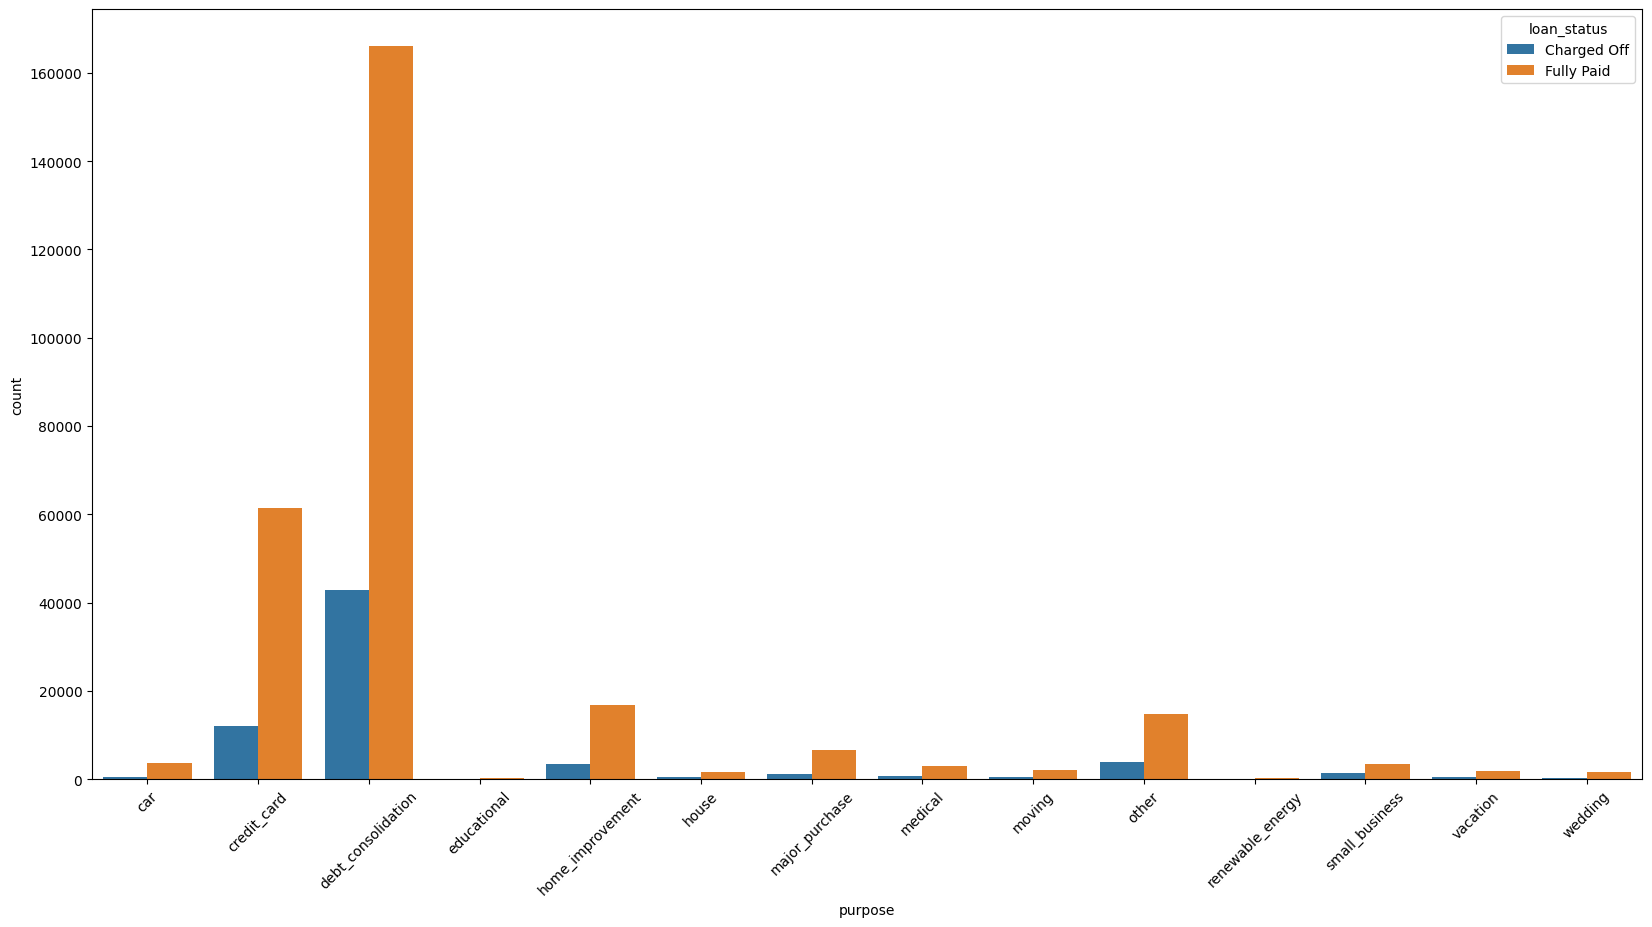

In [ ]:
# Impact of purpose on loan status
plt.figure(figsize=(20,10))
d= sns.countplot(data =df , x =df["purpose"] , hue = "loan_status")
d.set_xticklabels(d.get_xticklabels(), rotation=45)

<ipython-input-167-d7e0b02833f9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_xticklabels(d.get_xticklabels(), rotation=45)


[Text(0, 0, 'OK'),
 Text(1, 0, 'SD'),
 Text(2, 0, 'WV'),
 Text(3, 0, 'MA'),
 Text(4, 0, 'VA'),
 Text(5, 0, 'DE'),
 Text(6, 0, 'TX'),
 Text(7, 0, 'AE'),
 Text(8, 0, 'AP'),
 Text(9, 0, 'NM'),
 Text(10, 0, 'MS'),
 Text(11, 0, 'NH'),
 Text(12, 0, 'HI'),
 Text(13, 0, 'PA'),
 Text(14, 0, 'CO'),
 Text(15, 0, 'AL'),
 Text(16, 0, 'FL'),
 Text(17, 0, 'AZ'),
 Text(18, 0, 'WI'),
 Text(19, 0, 'NC'),
 Text(20, 0, 'IN'),
 Text(21, 0, 'MO'),
 Text(22, 0, 'AA'),
 Text(23, 0, 'KS'),
 Text(24, 0, 'CT'),
 Text(25, 0, 'WY'),
 Text(26, 0, 'NE'),
 Text(27, 0, 'RI'),
 Text(28, 0, 'AR'),
 Text(29, 0, 'MI'),
 Text(30, 0, 'LA'),
 Text(31, 0, 'NY'),
 Text(32, 0, 'ND'),
 Text(33, 0, 'IA'),
 Text(34, 0, 'AK'),
 Text(35, 0, 'UT'),
 Text(36, 0, 'MD'),
 Text(37, 0, 'IL'),
 Text(38, 0, 'WA'),
 Text(39, 0, 'MN'),
 Text(40, 0, 'OH'),
 Text(41, 0, 'MT'),
 Text(42, 0, 'NJ'),
 Text(43, 0, 'TN'),
 Text(44, 0, 'DC'),
 Text(45, 0, 'NV'),
 Text(46, 0, 'VT'),
 Text(47, 0, 'CA'),
 Text(48, 0, 'OR'),
 Text(49, 0, 'ME'),
 Text(50, 

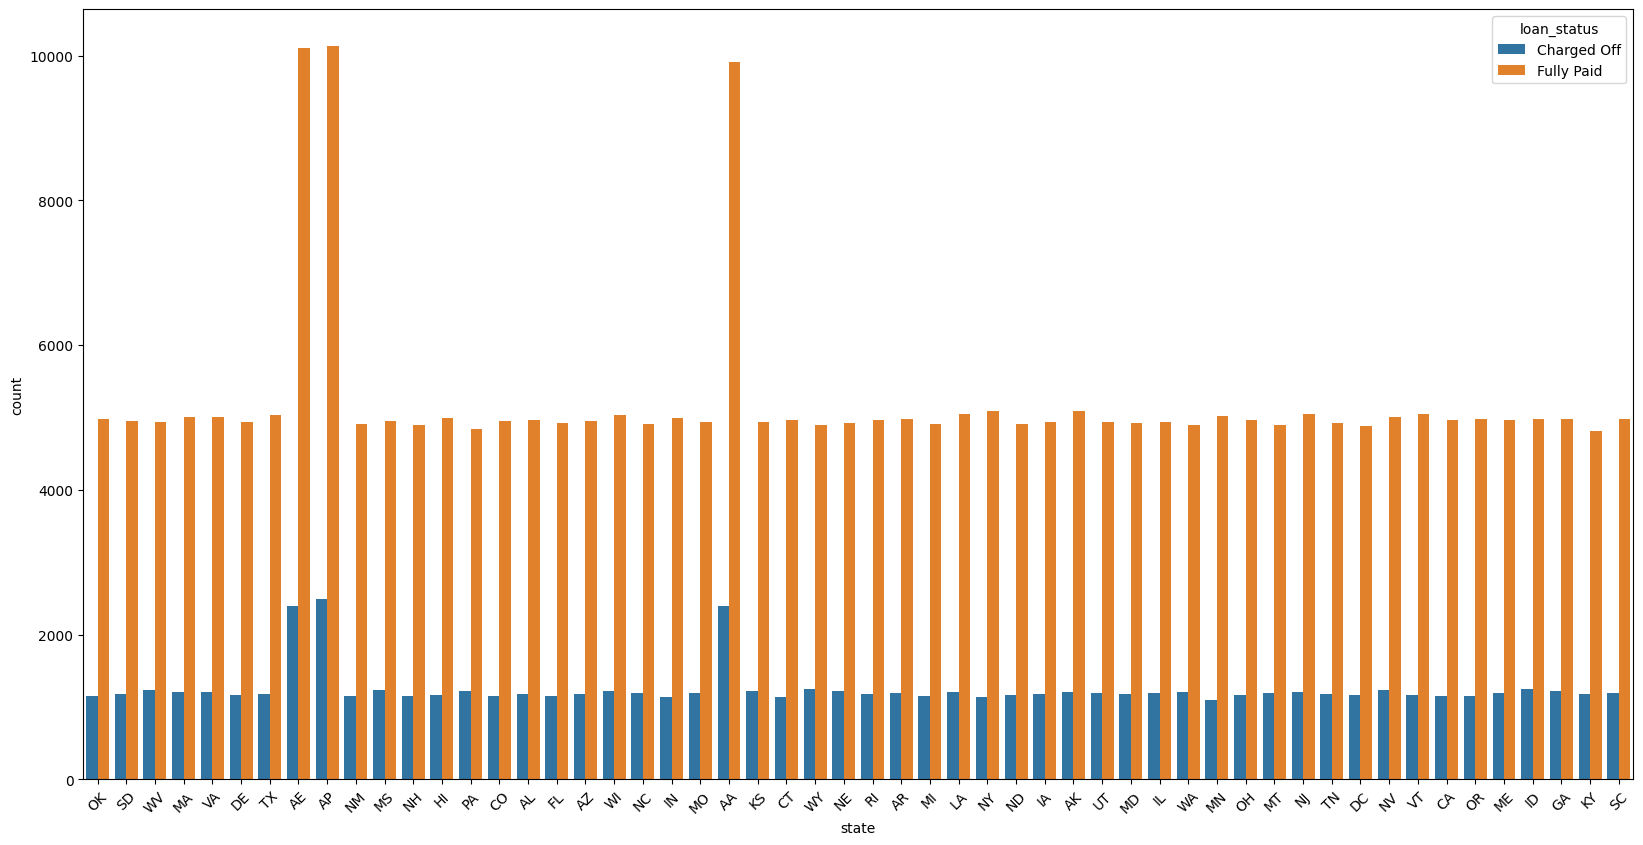

In [ ]:
# Impact of status on loan status
plt.figure(figsize=(20,10))
d= sns.countplot(data =df , x =df["state"] , hue = "loan_status")
d.set_xticklabels(d.get_xticklabels(), rotation=45)

OBSERVATION

1. The % of defaulters is much higher for longer (60-month) term.
2. As expected, grade/sub-grade has the maximum impact on loan_status with highest grade having maximum defaulters
3. Zip codes such as 11650, 86630 and 93700 have 100% defaulters.
4. We can remove initial_list_status and state as they have no impact on loan_status.
5. public records also don't seem to have any impact on loan_status surprisingly.
6. Direct pay application type has higher default rate compared to individual/joint.
7. Loan taken for the purpose of small business has the highest rate of default.
8. AE , AP , AA  have highest number of defaulters.
9. debt_consolidation has highest number of defaulters.





IndexError: index 10 is out of bounds for axis 0 with size 10

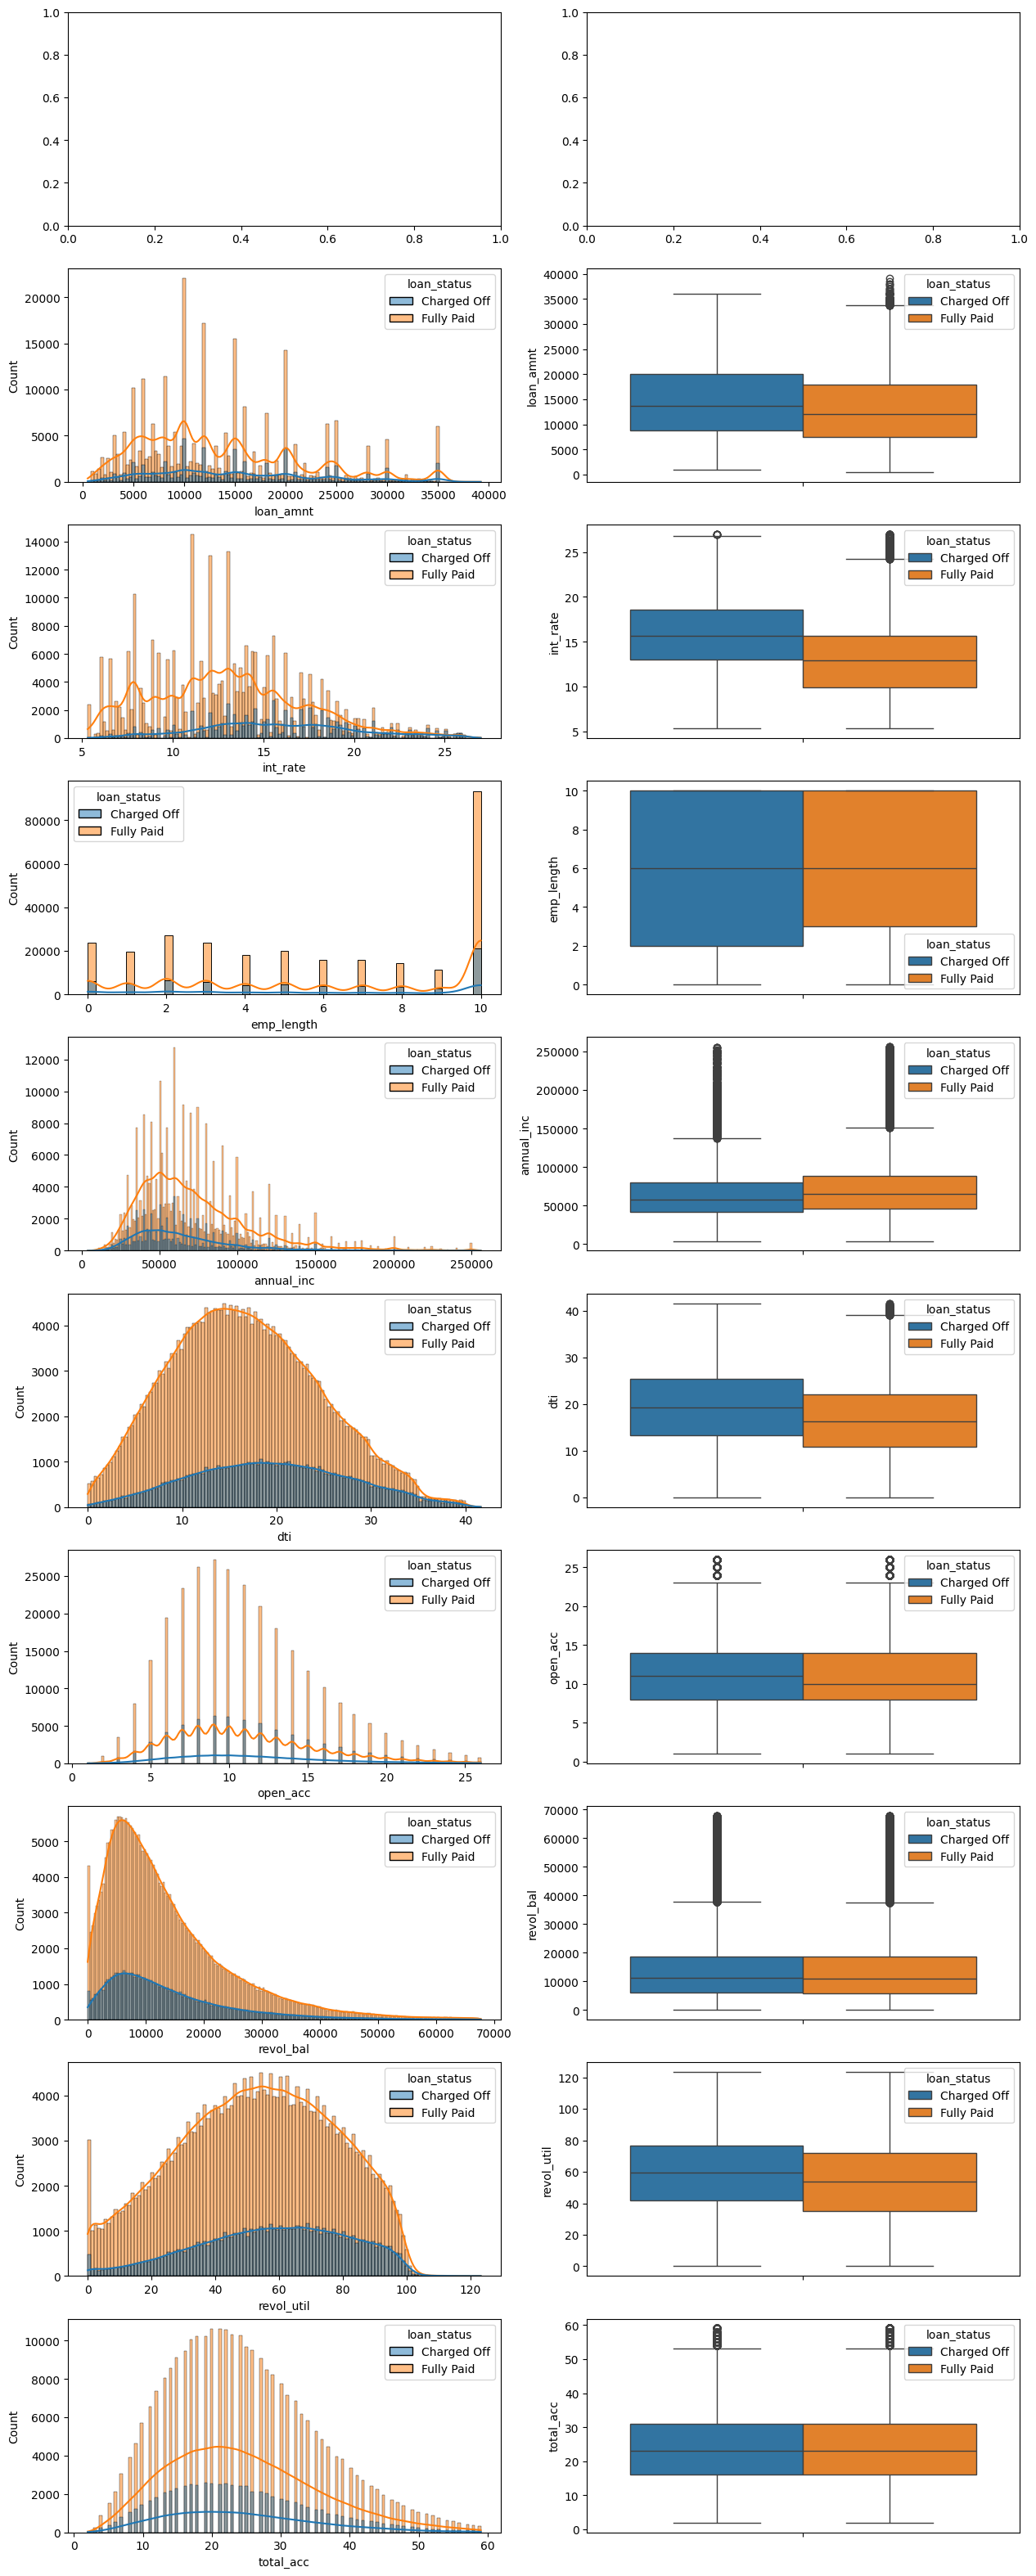

In [ ]:
# Impact of numerical features on loan_status
num_cols = df.select_dtypes(include='number').columns
fig, ax = plt.subplots(10,2,figsize=(15,40))
i =1
for col in num_cols:
  sns.histplot(data =df , x =col , hue = "loan_status", ax = ax[i,0], kde = True, fill = True)
  sns.boxplot(data =df , y =col , hue = "loan_status", ax = ax[i,1])
  i +=1
plt.tight_layout()
plt.show()

OBSERVATION
From the boxplots, it can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are slightly higher for defaulters while annual income is lower

In [ ]:
# remove the columns which does not have any impact on loan_status
df.drop(columns=['initial_list_status','state',
                 'emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade'], inplace=True)
# Subgrade is removed because grade and subgrade are similar features

KeyError: "['initial_list_status', 'state', 'emp_title', 'title', 'earliest_cr_line', 'issue_d', 'sub_grade'] not found in axis"

In [ ]:
df.drop(columns=["address"])

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36 months,11.44,B,10.0,RENT,117000.0,Not Verified,0,vacation,26.24,16.0,yes,36369.0,41.8,25.0,INDIVIDUAL,0.0,no,22690
1,8000.0,36 months,11.99,B,4.0,MORTGAGE,65000.0,Not Verified,0,debt_consolidation,22.05,17.0,yes,20131.0,53.3,27.0,INDIVIDUAL,3.0,no,05113
2,15600.0,36 months,10.49,B,0.0,RENT,43057.0,Source Verified,0,credit_card,12.79,13.0,yes,11987.0,92.2,26.0,INDIVIDUAL,0.0,no,05113
3,7200.0,36 months,6.49,A,6.0,RENT,54000.0,Not Verified,0,credit_card,2.60,6.0,yes,5472.0,21.5,13.0,INDIVIDUAL,0.0,no,00813
4,24375.0,60 months,17.27,C,9.0,MORTGAGE,55000.0,Verified,1,credit_card,33.95,13.0,yes,24584.0,69.8,43.0,INDIVIDUAL,1.0,no,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,B,2.0,RENT,40000.0,Source Verified,0,debt_consolidation,15.63,6.0,yes,1990.0,34.3,23.0,INDIVIDUAL,0.0,no,30723
396026,21000.0,36 months,12.29,C,5.0,MORTGAGE,110000.0,Source Verified,0,debt_consolidation,21.45,6.0,yes,43263.0,95.7,8.0,INDIVIDUAL,1.0,no,05113
396027,5000.0,36 months,9.99,B,10.0,RENT,56500.0,Verified,0,debt_consolidation,17.56,15.0,yes,32704.0,66.9,23.0,INDIVIDUAL,0.0,no,70466
396028,21000.0,60 months,15.31,C,10.0,MORTGAGE,64000.0,Verified,0,debt_consolidation,15.88,9.0,yes,15704.0,53.8,20.0,INDIVIDUAL,5.0,no,29597


### DATA PRE PROCESSING

In [ ]:
# encoding target variable
df['loan_status']=df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
x = df.drop(columns=['loan_status',"address"])
x.reset_index(inplace=True, drop=True)
x.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36 months,11.44,B,10.0,RENT,117000.0,Not Verified,vacation,26.24,16.0,yes,36369.0,41.8,25.0,INDIVIDUAL,0.0,no,22690
1,8000.0,36 months,11.99,B,4.0,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,17.0,yes,20131.0,53.3,27.0,INDIVIDUAL,3.0,no,05113
2,15600.0,36 months,10.49,B,0.0,RENT,43057.0,Source Verified,credit_card,12.79,13.0,yes,11987.0,92.2,26.0,INDIVIDUAL,0.0,no,05113
3,7200.0,36 months,6.49,A,6.0,RENT,54000.0,Not Verified,credit_card,2.60,6.0,yes,5472.0,21.5,13.0,INDIVIDUAL,0.0,no,00813
4,24375.0,60 months,17.27,C,9.0,MORTGAGE,55000.0,Verified,credit_card,33.95,13.0,yes,24584.0,69.8,43.0,INDIVIDUAL,1.0,no,11650


In [ ]:
y = df["loan_status"]
y.reset_index(inplace=True, drop=True)
y.head()

0    0
1    0
2    0
3    0
4    1
Name: loan_status, dtype: int64

In [ ]:
# Encoding Binary features into numerical dtype
x['term']= x['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)
x['pub_rec']=x['pub_rec'].map({'no': 0, 'yes':1}).astype(int)
x['pub_rec_bankruptcies']=x['pub_rec_bankruptcies'].map({'no': 0, 'yes':1}).astype(int)

ONE HOT ENCODING OF CATEGORICAL FEATURES

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = x.select_dtypes('category').columns

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x,encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,10.0,117000.0,26.24,16.0,1,36369.0,41.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,1,20131.0,53.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36,10.49,0.0,43057.0,12.79,13.0,1,11987.0,92.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,1,5472.0,21.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,1,24584.0,69.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TRAIN TEST SPLIT

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280676, 56), (280676,), (70169, 56), (70169,))

SCALING NUMERIC FEATURES

In [ ]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

### Oversampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())
print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 54309
Before OverSampling, count of label 0: 226367
After OverSampling, count of label 1: 226367
After OverSampling, count of label 0: 226367


### LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()
model.fit(x_train_res, y_train_res)
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor

Train Accuracy : 0.8
Train F1 Score: 0.61
Train Recall Score: 0.81
Train Precision Score: 0.49

Test Accuracy : 0.8
Test F1 Score: 0.6
Test Recall Score: 0.81
Test Precision Score: 0.48


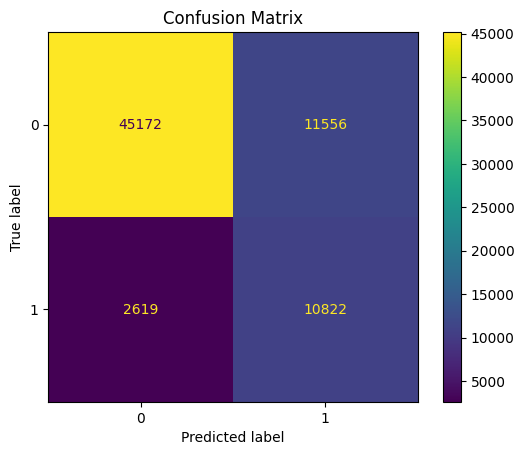

In [ ]:
#Model Evaluation
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86     56728
           1       0.48      0.81      0.60     13441

    accuracy                           0.80     70169
   macro avg       0.71      0.80      0.73     70169
weighted avg       0.86      0.80      0.81     70169



It can be observed that the recall score is very high (our model is able to identify 80% of actual defaulters) but the precision is low for positive class (of all the predicted defaulters, only 50% are actually defaulters).

Although this model is effective in reducing NPAs by flagging most of the defaulters, it may cause loantap to deny loans to many deserving customers due to low precision (false positives)

Low precision has also caused F1 score to drop to 60% even though accuracy is 80%

### FEATURE IMPORTANCE

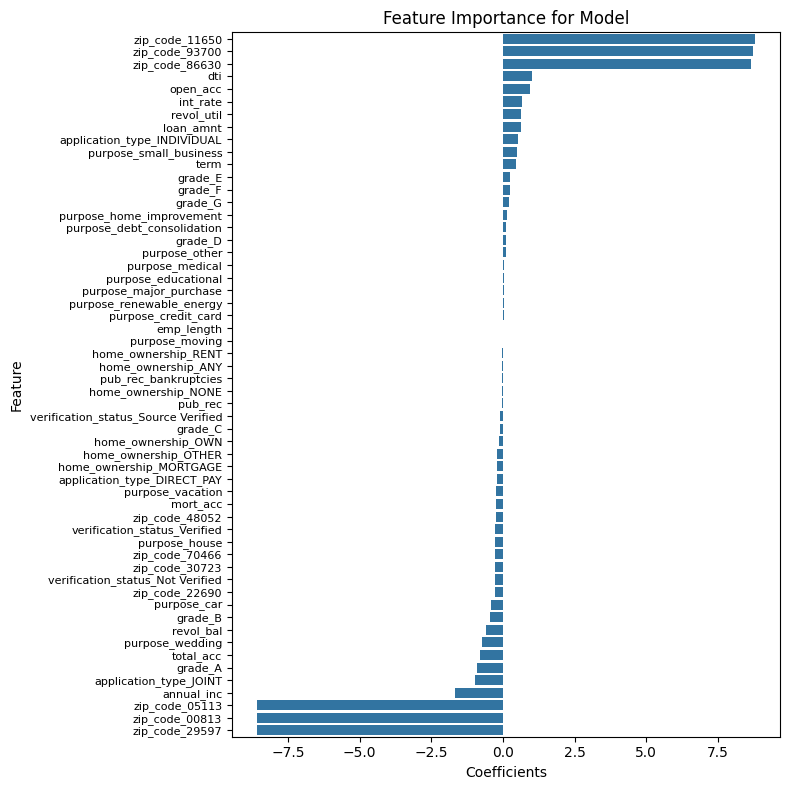

In [ ]:
feature_imp = pd.DataFrame({'Columns':x_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The model has assigned large weightage to zip_code features followed by dti, open_acc, loan_amnt

Similarly, large negative coefficients are assigned to a few zip codes, followed by annual income and joint application type

ROC Curve & AUC

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It helps evaluate and compare different models by illustrating the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various classification thresholds.

The ROC curve is created by plotting the TPR on the y-axis against the FPR on the x-axis for different threshold values.

TPR: Also known as sensitivity or recall, is the proportion of true positive predictions out of all actual positive instances.
FPR: Proportion of false positive predictions out of all actual negative instances.
A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in a point at the top-left corner of the ROC curve. On the other hand, a random classifier would have an ROC curve following the diagonal line, as it has an equal chance of producing true positive and false positive predictions.

The area under the ROC curve (AUC) is a commonly used metric to quantify the overall performance of a classifier.

A perfect classifier would have an AUC of 1, while a random classifier would have an AUC of 0.5. The higher the AUC value, the better the classifier's performance in distinguishing between positive and negative instances.

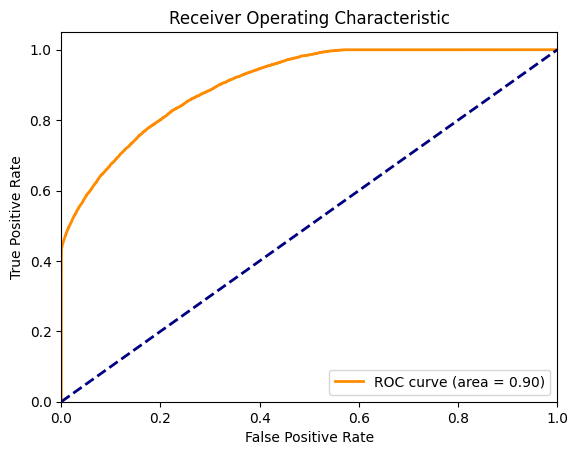

In [ ]:
# Predict probabilities for the test set
probs = model.predict_proba(x_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


AUC of 0.91 signifies that the model is able to discriminate well between the positive and the negative class.
But it is not a good measure for an imbalanced target variable because it may be high even when the classifier has a poor score on the minority class.

This can happen when the classifier performs well on the majority class instances, which dominate the dataset. As a result, the AUC may appear high, but the model may not effectively identify the minority class instances.

Lets plot the Precision-Recall curve which is more suited for evaluation of imbalanced data

Precision Recall Curve

The Precision-Recall (PR) curve is another graphical representation commonly used to evaluate the performance of a binary classification model. It provides insights into the trade-off between precision and recall at various classification thresholds.

Precision represents the proportion of correctly predicted positive instances out of all instances predicted as positive. It focuses on the accuracy of positive predictions.
Recall, also known as sensitivity or true positive rate, represents the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on capturing all positive instances.
Similar to the ROC curve, the PR curve is created by plotting recall on the x-axis and precision on the y-axis for different threshold values. The curve illustrates the relationship between precision and recall as the classification threshold changes.

A perfect classifier would have a precision of 1 and a recall of 1, resulting in a point at the top-right corner of the PR curve. Conversely, a random classifier would have a PR curve following the horizontal line defined by the ratio of positive instances in the dataset.

The PR curve is useful when dealing with imbalanced datasets, where the number of negative instances far outweighs the positives. In such cases, the PR curve provides a more comprehensive evaluation of the model's performance compared to the ROC curve. This is because the ROC curve can be misleading when the majority of instances are negative, as it primarily focuses on the true negative rate.

The area under the PR curve (AUPRC) is a commonly used metric to quantify the overall performance of a classifier. A perfect classifier would have an AUPRC of 1, while a random classifier would have an AUPRC equal to the ratio of positive instances. Generally, a higher AUPRC indicates better performance.

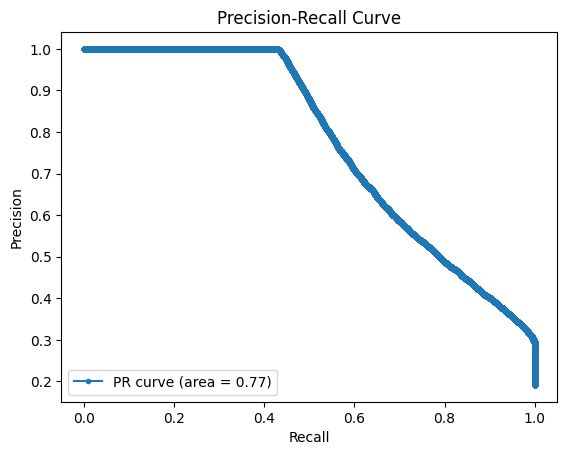

In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

As expected, the area under precision recall curve is not as high. It is a decent model as the area is more than 0.5 (random model benchmark) but there is still scope for improvement

Conclusion
Q1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Ans: Precision score is an indicator of type1 error. Increasing precision score of the model will minimise false positives and ensure that the company is not losing out on the opportunity to finance worthy individuals.

Q2. Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.

Ans: Recall score is an indicator of how many actual defaulters are flagged by the model. By increasing the recall score, we can minimise false negatives (type2 error) and ensure that loans are not disbursed to defaulters.

Insights

Impact of Categorical Attributes on loan_status (target variable):

The % of defaulters is much higher for longer (60-month) term

As expected, grade/sub-grade has the maximum impact on loan_status with highest grade having maximum defaulters
Zip codes such as 11650, 86630 and 93700 have 100% defaulters

We can remove initial_list_status and state as they have no impact on loan_status

Direct pay application type has higher default rate compared to individual/joint

Loan taken for the purpose of small business has the highest rate of default

Impact of Numerical Attributes on loan_status (target variable):

It can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are higher for defaulters

The mean annual income is lower for defaulters

A Logistic Regression model (trained after upsampling the data to balance the target variable) performed well, rendering accuracy of 80%.

The model had a precision score of 95%, recall score of 80%, and f1 score of 87% on the negative class

The model had a precision score of 49%, recall score of 81%, and f1 score of 61% on the positive class

The ROC plot shows that the area under ROC curve is 0.91, which signifies that the model is able to differentiate well between both classes

The area under Precision Recall curve is 0.78 (can be improved using hyperparameter tuning/increasing model complexity)

Recommendations

The optimal strategy to achieve the objective of balancing the risk of increasing NPAs by disbursing loans to defaulters with the opportunity to earn interest by disbursing loans to as many worthy customers as possible: maximise the F1 score along with the area under Precision Recall Curve (precision-recall trade-off)

More complex classifiers like random forest would give better results compared to logistic regression because they are not restricted by the linearity of decision boundary